In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [2]:
ls

 Volume in drive C is Acer
 Volume Serial Number is 361B-9495

 Directory of C:\Users\Karthik\Downloads\assignments\simple linear regression

23-01-2023  12:52    <DIR>          .
23-01-2023  11:08    <DIR>          ..
23-01-2023  12:43    <DIR>          .ipynb_checkpoints
23-01-2023  12:52             9,093 Delivery_data_SLR.ipynb
06-01-2023  19:53               218 delivery_time.csv
06-01-2023  19:53               318 Problem_statements.txt
06-01-2023  19:53               454 Salary_Data.csv
23-01-2023  12:41           114,294 Salary_data_SLR.ipynb
               5 File(s)        124,377 bytes
               3 Dir(s)  334,725,312,512 bytes free


In [3]:
del_data=pd.read_csv("Delivery_time.csv")
del_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
del_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
del_data.rename(columns={'Delivery Time':'del_time','Sorting Time':'sort'},inplace=True)
del_data

,del_time,sort
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
del_data.tail()

,del_time,sort
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [8]:
del_data.shape

(21, 2)

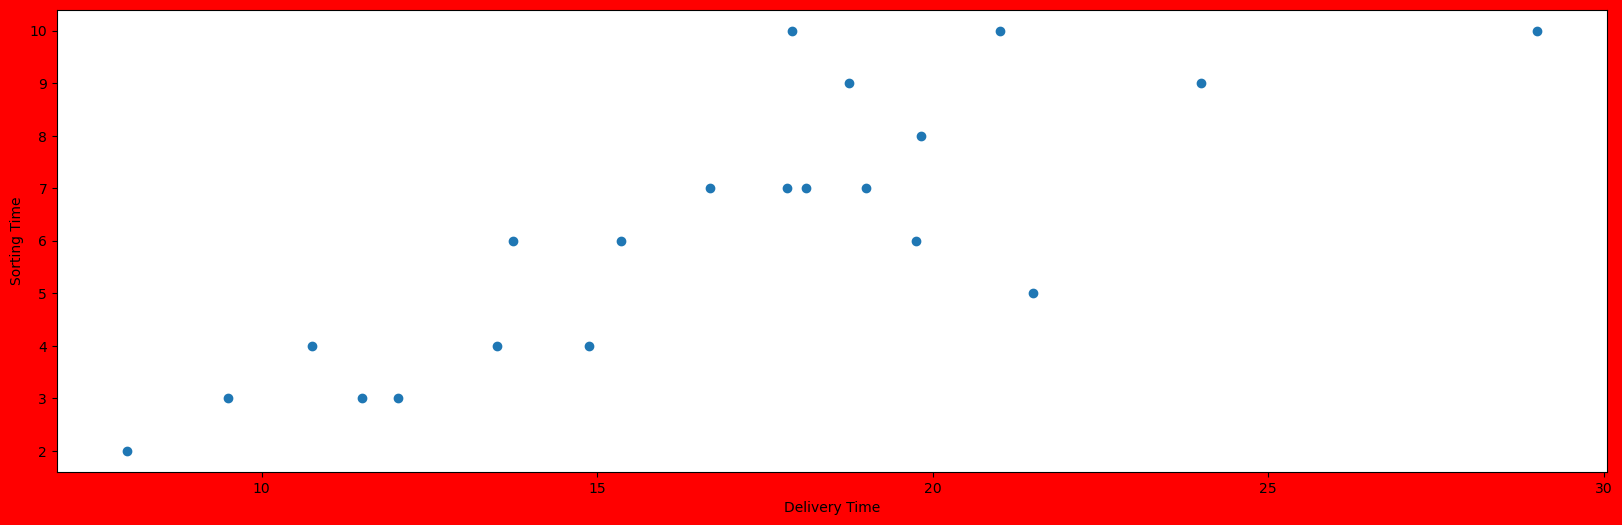

In [9]:
plt.figure(figsize=(20,6),facecolor="red")
plt.scatter(del_data.del_time,del_data.sort)
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")
plt.show()

In [10]:
del_data.corr()

,del_time,sort
del_time,1.000000,0.825997
sort,0.825997,1.000000


In [24]:
f1=smf.ols("del_time~sort",data=del_data).fit()

In [25]:
f1.params

Intercept    6.582734
sort         1.649020
dtype: float64

In [26]:
f1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               del_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        13:21:24   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
sort           1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

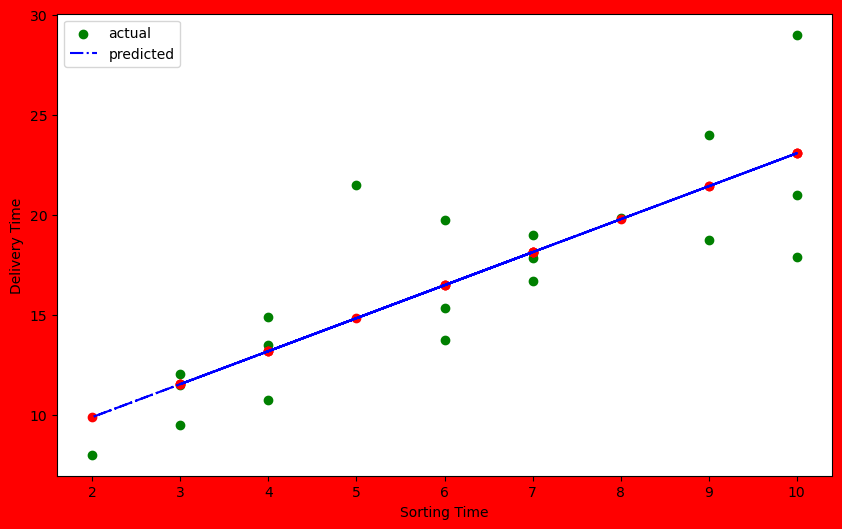

In [28]:
plt.figure(figsize=(10,6),facecolor="red")
plt.scatter(del_data.sort,del_data.del_time,label="actual",color="green")
plt.plot(del_data.sort,f1.predict(),label="predicted",linestyle="-.",color="blue")
plt.scatter(del_data.sort,f1.predict(),color="red")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.legend(loc="best")
plt.show()

In [31]:
f2=smf.ols('del_time~np.log(sort)',data=del_data).fit()
f2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               del_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           2.64e-06
Time:                        13:23:49   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sort)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
f2=smf.ols('np.log(del_time)~np.log(sort)',data=del_data).fit()
f2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(del_time)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           1.60e-07
Time:                        13:27:13   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sort)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
f3=smf.ols('np.log(del_time)~sort',data=del_data).fit()
f3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(del_time)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           1.59e-06
Time:                        13:25:11   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
sort           0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
del_data["sort_time_sq"]=del_data.sort**2
print(del_data)
model_quad=smf.ols("np.log(del_time)~sort+sort_time_sq",data=del_data).fit()
model_quad.summary()

    del_time  sort  del_time_sq  sort_time_sq
0      21.00    10     441.0000           100
1      13.50     4     182.2500            16
2      19.75     6     390.0625            36
3      24.00     9     576.0000            81
4      29.00    10     841.0000           100
5      15.35     6     235.6225            36
6      19.00     7     361.0000            49
7       9.50     3      90.2500             9
8      17.90    10     320.4100           100
9      18.75     9     351.5625            81
10     19.83     8     393.2289            64
11     10.75     4     115.5625            16
12     16.68     7     278.2224            49
13     11.50     3     132.2500             9
14     12.03     3     144.7209             9
15     14.88     4     221.4144            16
16     13.75     6     189.0625            36
17     18.11     7     327.9721            49
18      8.00     2      64.0000             4
19     17.83     7     317.9089            49
20     21.50     5     462.2500   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(del_time)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           2.20e-06
Time:                        13:26:15   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.6997      0.228      7.441      0.000       1.220       2.180
sort             0.2659      0.080      3.315      0.004       0.097       0.434
sort_time_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
del_data["sort_cube"]=del_data.sort**3
print(del_data)


    del_time  sort  del_time_sq  sort_time_sq  sort_cube
0      21.00    10     441.0000           100       1000
1      13.50     4     182.2500            16         64
2      19.75     6     390.0625            36        216
3      24.00     9     576.0000            81        729
4      29.00    10     841.0000           100       1000
5      15.35     6     235.6225            36        216
6      19.00     7     361.0000            49        343
7       9.50     3      90.2500             9         27
8      17.90    10     320.4100           100       1000
9      18.75     9     351.5625            81        729
10     19.83     8     393.2289            64        512
11     10.75     4     115.5625            16         64
12     16.68     7     278.2224            49        343
13     11.50     3     132.2500             9         27
14     12.03     3     144.7209             9         27
15     14.88     4     221.4144            16         64
16     13.75     6     189.0625

In [36]:
model_qurd=smf.ols("np.log(del_time)~sort+sort_time_sq+sort_cube",data=del_data).fit()
model_qurd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(del_time)   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     20.31
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           7.37e-06
Time:                        13:32:39   Log-Likelihood:                 10.748
No. Observations:                  21   AIC:                            -13.50
Df Residuals:                      17   BIC:                            -9.317
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0716      0.591      1.814      0.087      -0.175       2.318
sort             0.6495      0.343      1.896      0.075      -0.073       1.372
sort_time_sq    -0.0809      0.059     -1.361      0.191      -0.206       0.045
sort_cube        0.0036      0.003      1.151      0.266      -0.003       0.010
==============================================================================
Omnibus:                        0.352   Durbin-Watson:                   1.450
Prob(Omnibus):                  0.839   Jarque-Bera (JB):                0.371
Skew:                           0.260   Prob(JB):                        0.831
Kurtosis:                       2.608   Cond. No.                     9.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""